Source of this dataset :

https://lionbridge.ai/datasets/10-open-datasets-for-linear-regression/

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## Checking out the data

In [3]:
print("Reading the dataset")
who_df = pd.read_csv("datasets_12603_17232_Life Expectancy Data.csv")
print("------------------------------------------------------------------------------------------------------")
display(who_df.head(5))
print("------------------------------------------------------------------------------------------------------")
print("No of rows :", who_df.shape[0])
print("No of columns :", who_df.shape[1])
print("Name of the columns: ", who_df.columns)

Reading the dataset
------------------------------------------------------------------------------------------------------


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


------------------------------------------------------------------------------------------------------
No of rows : 2938
No of columns : 22
Name of the columns:  Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [4]:
print("------------------------------------------------------------------------------------------------------")
print("Datatype Details")
print(who_df.info())
print("------------------------------------------------------------------------------------------------------")
print("Statistical Summary")
print(who_df.describe())
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Datatype Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                    

# Renaming Column names  

In [5]:
# Function_name : rename_columns
# Usage : Renaming the columns removing whitespace and Upper case
# Arguments : new_df, original_df
# Returns : new_df with new column names

def rename_columns(new_df, original_df):
    columns = {}
    for col in original_df.columns:
        columns.update({col : col.strip().lower()})
        
    new_df.rename(columns=columns, inplace=True)
    print(new_df.columns)
    return new_df

rename_columns(who_df, who_df)

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')


,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Correlation Between the Features

In [14]:
who_df.corr()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
hepatitis b,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
bmi,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [8]:
mask = np.array(who_df.corr())
mask[np.tril_indices_from(mask)] = False

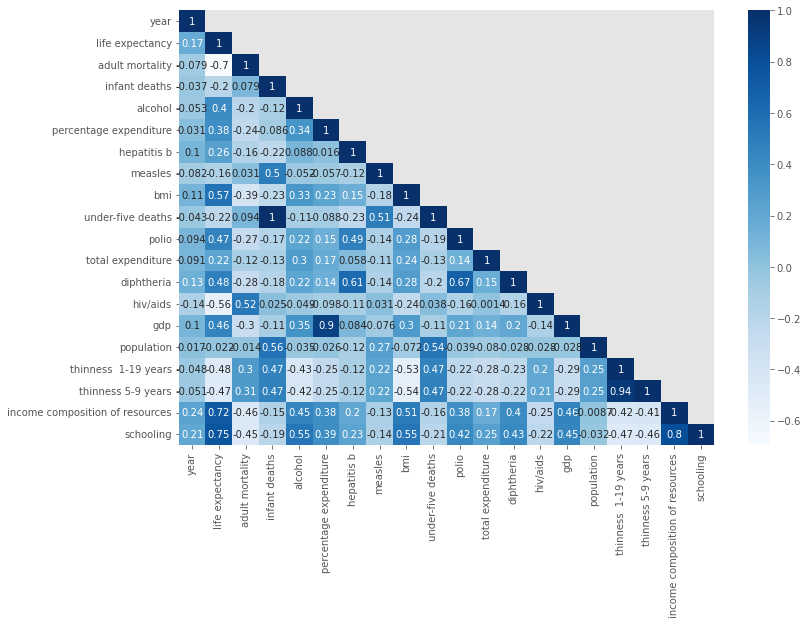

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(who_df.corr(), mask=mask, annot=True, cmap="Blues")
plt.show()

## Missing Data Handling

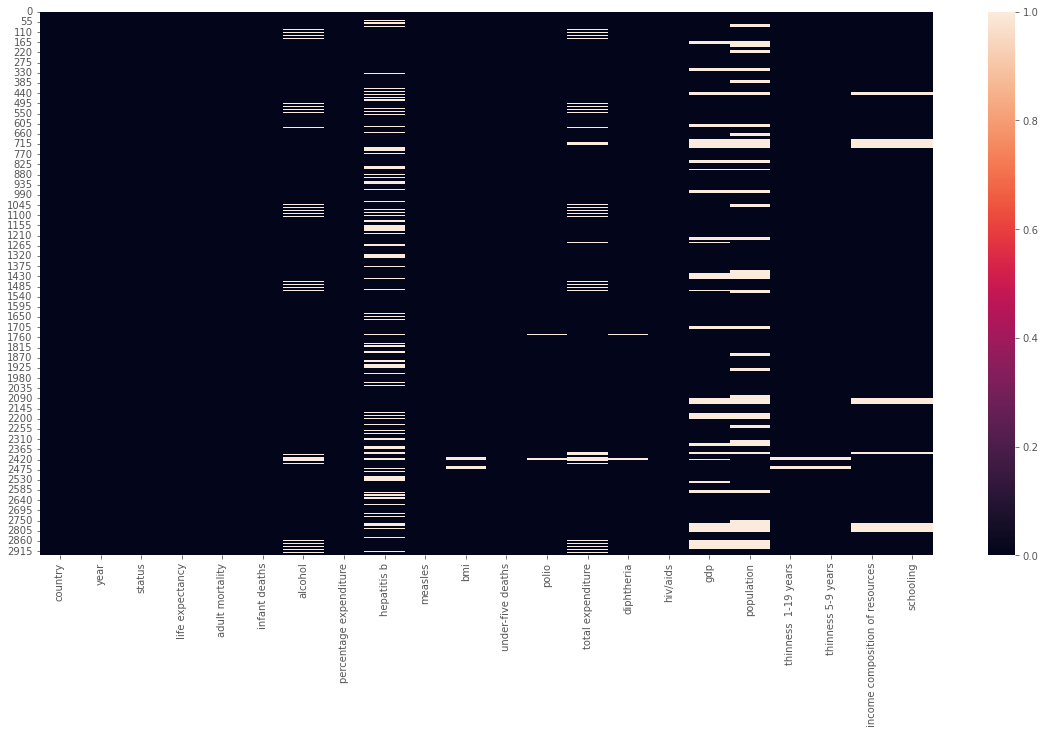

In [15]:
# Looking at the missing values of the data

plt.figure(figsize=(20,10))
sns.heatmap(who_df.isnull())
plt.show()

In [16]:
# Function_name : calculate_missingdata_pct
# Usage : Calculates percentage of missing values for all features in a DataFrame
# Arguments : df
# Returns : missingdata

# Let's see the percentage of missing Data per feature
# df.isna().values.any() is a quick way to check if column has any null value
# We can append a df just like a list

def calculate_missingdata_pct(df):
    missingdata = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missingdata = missingdata.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missingdata
df = calculate_missingdata_pct(who_df)
df.sort_values("percentage", ascending = False)

,category,percentage
9,population,22.191967
3,hepatitis b,18.822328
8,gdp,15.248468
6,total expenditure,7.692308
2,alcohol,6.603131
12,income composition of resources,5.684139
13,schooling,5.547992
4,bmi,1.15725
10,thinness 1-19 years,1.15725
11,thinness 5-9 years,1.15725


In [17]:
# Function_name : drop_rows
# Usage : dropping rows if the feature has very less missing value (<threshold)
#
# Arguments : df, missingdata_df, threshold, inplace_value
# missingdata_df is a df with features (category, percentage)
# threshold is float
#
# Returns : df

# Dropping the rows with missing values where feature has less than threshold missing value

def drop_rows(df, missingdata_df, threshold=2, inplace_value=False):
    drop_rows = []
    for ind in missingdata_df.index: 
        if missingdata_df['category'][ind] in df.columns:
            if missingdata_df['percentage'][ind] < threshold:
                drop_rows.append(missingdata_df['category'][ind])

    print("Drop rows :",drop_rows)
    df.dropna(subset=drop_rows, inplace=inplace_value)
    return df

missingdata = calculate_missingdata_pct(who_df)

who_df = drop_rows(who_df, missingdata, threshold=2, inplace_value=True)

Drop rows : ['life expectancy', 'adult mortality', 'bmi', 'polio', 'diphtheria', 'thinness  1-19 years', 'thinness 5-9 years']


In [18]:
missingdata = calculate_missingdata_pct(who_df)
missingdata.sort_values("percentage", ascending=False)

,category,percentage
4,population,22.299169
1,hepatitis b,18.17867
3,gdp,15.062327
2,total expenditure,7.34072
0,alcohol,6.059557
5,income composition of resources,5.540166
6,schooling,5.540166


In [19]:
who_df.drop(['population', 'hepatitis b', 'gdp', 'schooling', 'under-five deaths'], axis=1, inplace=True)
who_df.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'measles', 'bmi',
       'polio', 'total expenditure', 'diphtheria', 'hiv/aids',
       'thinness  1-19 years', 'thinness 5-9 years',
       'income composition of resources'],
      dtype='object')

In [20]:
missingdata = calculate_missingdata_pct(who_df)
missingdata.sort_values("percentage", ascending=False)

,category,percentage
1,total expenditure,7.34072
0,alcohol,6.059557
2,income composition of resources,5.540166


In [21]:
# Rest of the missing values we will fill up using correlation and impute function
# Here is country-wise mean of all features

countrywise_mean = who_df.groupby("country").mean()

In [22]:
countrywise_mean[['total expenditure', 'alcohol', 'income composition of resources']]

,total expenditure,alcohol,income composition of resources
country,,,
Afghanistan,8.252500,0.014375,0.415375
Albania,5.945625,4.848750,0.709875
Algeria,4.604000,0.406667,0.694875
Angola,3.919333,5.740667,0.458375
Antigua and Barbuda,4.791333,7.949333,0.488625
...,...,...,...
Venezuela (Bolivarian Republic of),4.998667,7.420000,0.726812
Viet Nam,5.977333,3.087333,0.627062
Yemen,5.005333,0.047333,0.475500


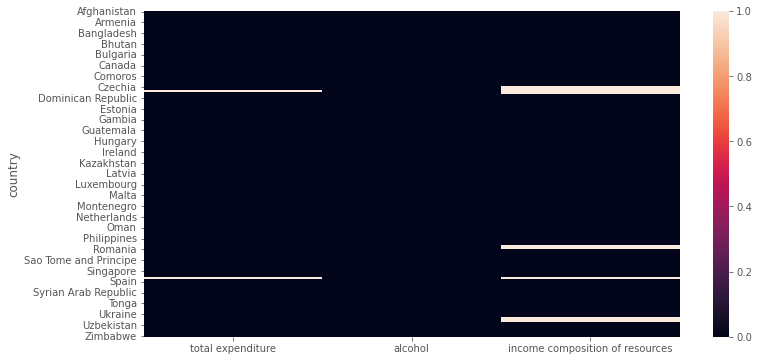

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(countrywise_mean[['total expenditure', 'alcohol', 'income composition of resources']].isnull())
plt.show()

In [24]:
# Function_name : impute_feature
# Usage : Imputing missing values with country wise mean
# Arguments : country_feature series
# Returns : feature value

def impute_feature(country_feature):
    country = country_feature[0] 
    feature = country_feature[1]
    
    # country_feature[0] is the country name, for eg. US
    # country_feature.keys()[0] is the column name, for eg. income
    
    if pd.isnull(feature):
        if not pd.isnull(countrywise_mean[country_feature.keys()[1]][country]):
            return countrywise_mean[country_feature.keys()[1]][country]
    else:
        return feature
    
features = ['alcohol', 'total expenditure', 'income composition of resources']
for feature in features: 
    who_df[feature] = who_df[['country', feature]].apply(impute_feature, axis=1)
    print(feature, who_df[feature].isna().values.any())


alcohol False
total expenditure True
income composition of resources True


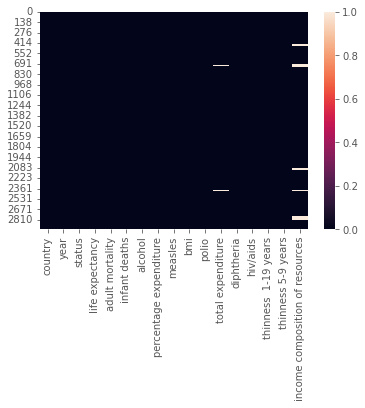

In [25]:
sns.heatmap(who_df.isna())
plt.show()

In [26]:
calculate_missingdata_pct(who_df)

,category,percentage
0,total expenditure,1.108033
1,income composition of resources,5.540166


### Country wise Analysis

In [27]:
countrywise_mean.shape

(181, 15)

In [30]:
countrywise_mean[['life expectancy']]

,life expectancy
country,
Afghanistan,58.19375
Albania,75.15625
Algeria,73.61875
Angola,49.01875
Antigua and Barbuda,75.05625
...,...
Venezuela (Bolivarian Republic of),73.38750
Viet Nam,74.77500
Yemen,63.86250


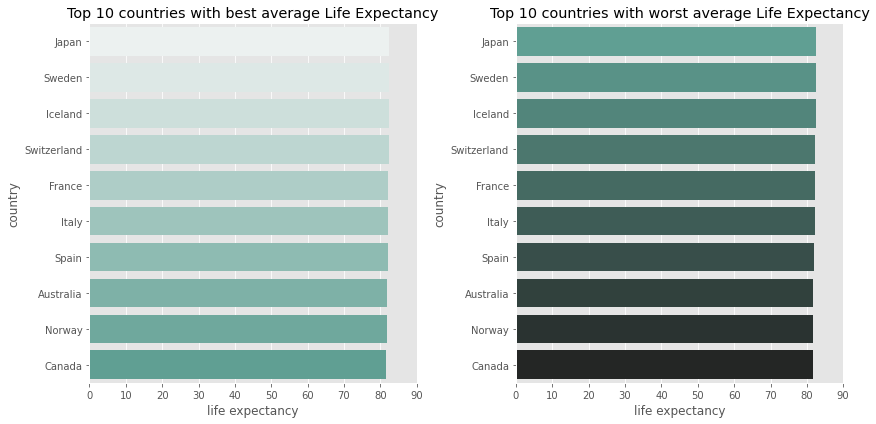

In [35]:
#data
top_10 = countrywise_mean[['life expectancy']].sort_values('life expectancy', ascending=False).head(10)
bottom_10 = countrywise_mean[['life expectancy']].sort_values('life expectancy', ascending=False).head(10)


fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1, title="Top 10 countries with best average Life Expectancy", xlim=(0,90))
ax2 = fig.add_subplot(1, 2, 2, title="Top 10 countries with worst average Life Expectancy", xlim=(0,90))

# approach 1
# countrywise_mean[['life expectancy']].sort_values('life expectancy', ascending=False).head(10).plot.bar(ax=ax1)
# countrywise_mean[['life expectancy']].sort_values('life expectancy', ascending=False).tail(10).plot.bar(ax=ax2)

# approach 2
sns.barplot(data=top_10, x='life expectancy', y=bottom_10.index,ax=ax1, palette='light:#5A9')
sns.barplot(data=bottom_10, x='life expectancy',y=bottom_10.index, ax=ax2, palette='dark:#5A9_r')

plt.tight_layout()
plt.show()

In [36]:
countrywise_mean.columns

Index(['year', 'life expectancy', 'adult mortality', 'infant deaths',
       'alcohol', 'percentage expenditure', 'measles', 'bmi', 'polio',
       'total expenditure', 'diphtheria', 'hiv/aids', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources'],
      dtype='object')

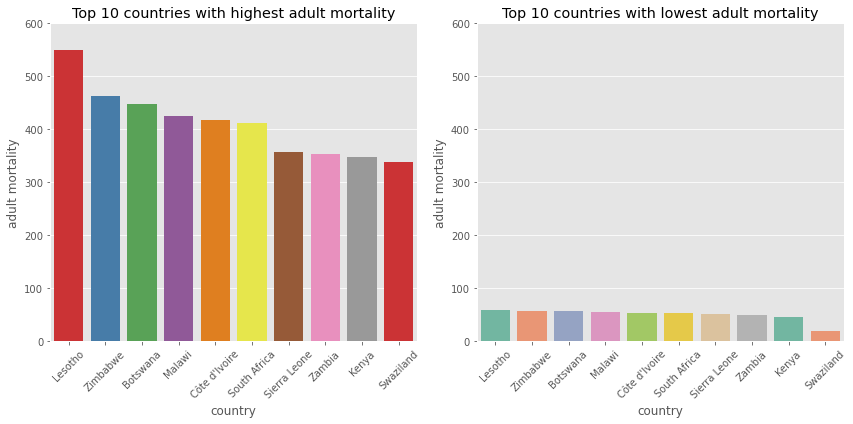

In [50]:
#data
df1 = countrywise_mean[['adult mortality']].sort_values('adult mortality', ascending=False).head(10)
df2 = countrywise_mean[['adult mortality']].sort_values('adult mortality', ascending=False).tail(10)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1, title="Top 10 countries with highest adult mortality", ylim=(0,600))
ax2 = fig.add_subplot(1, 2, 2, title="Top 10 countries with lowest adult mortality", ylim=(0,600))

sns.barplot(data=df1, x=df1.index, y='adult mortality', ax=ax1, palette='Set1')
sns.barplot(data=df2, x=df1.index, y='adult mortality', ax=ax2, palette='Set2')
# plt.xticks(rotation=45, ha='right')
ax1.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='x', labelrotation=45)
plt.tight_layout()

plt.show()

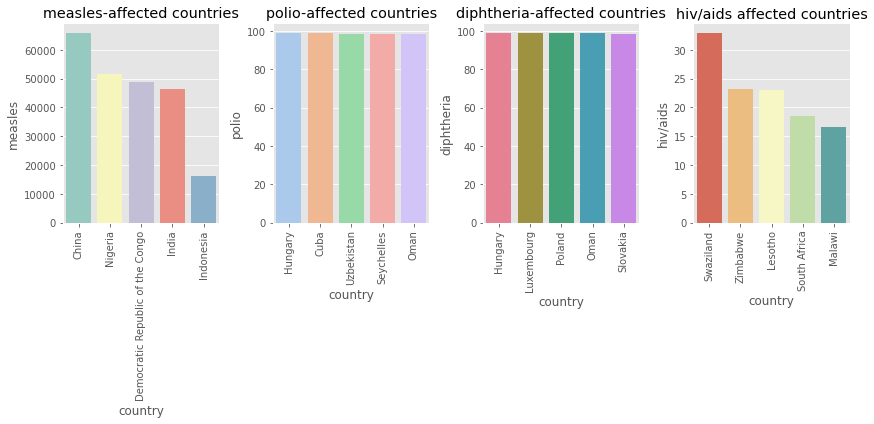

In [61]:
#data
df1=countrywise_mean[['measles']].sort_values('measles', ascending=False).head(5)
df2=countrywise_mean[['polio']].sort_values('polio', ascending=False).head(5)
df3=countrywise_mean[['diphtheria']].sort_values('diphtheria', ascending=False).head(5)
df4=countrywise_mean[['hiv/aids']].sort_values('hiv/aids', ascending=False).head(5)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 4, 1, title="measles-affected countries")
ax2 = fig.add_subplot(1, 4, 2, title="polio-affected countries")
ax3 = fig.add_subplot(1, 4, 3, title="diphtheria-affected countries")
ax4 = fig.add_subplot(1, 4, 4, title="hiv/aids affected countries")

sns.barplot(data=df1, x=df1.index, y='measles', ax=ax1, palette='Set3')
sns.barplot(data=df2, x=df2.index, y='polio', ax=ax2, palette='pastel')
sns.barplot(data=df3, x=df3.index, y='diphtheria', ax=ax3, palette='husl')
sns.barplot(data=df4, x=df4.index, y='hiv/aids', ax=ax4, palette='Spectral')

ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)
ax4.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

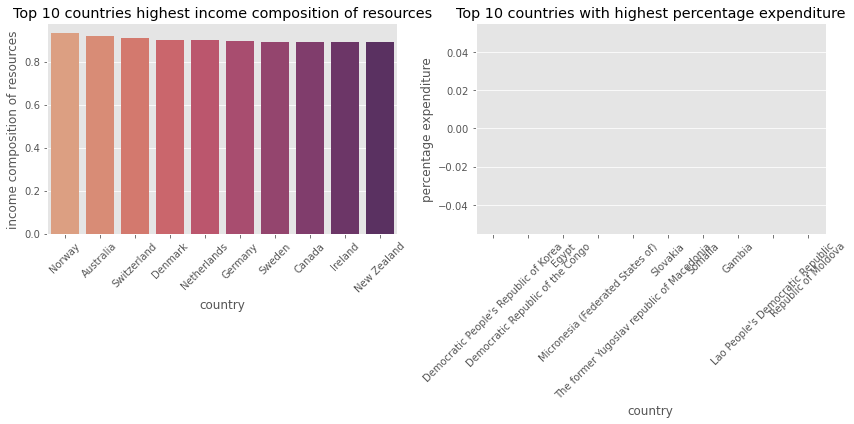

In [63]:
#data
df1 = countrywise_mean[['income composition of resources']].sort_values('income composition of resources', ascending=False).head(10)
df2 = countrywise_mean[['percentage expenditure']].sort_values('percentage expenditure', ascending=False).tail(10)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1, title="Top 10 countries highest income composition of resources")
ax2 = fig.add_subplot(1, 2, 2, title="Top 10 countries with highest percentage expenditure")

sns.barplot(data=df1, x=df1.index, y= df1['income composition of resources'], ax=ax1, palette='flare')
sns.barplot(data=df2, x=df2.index, y= df2['percentage expenditure'], ax=ax2, palette='coolwarm')

                                          
ax1.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='x', labelrotation=45)
plt.tight_layout()

plt.show()

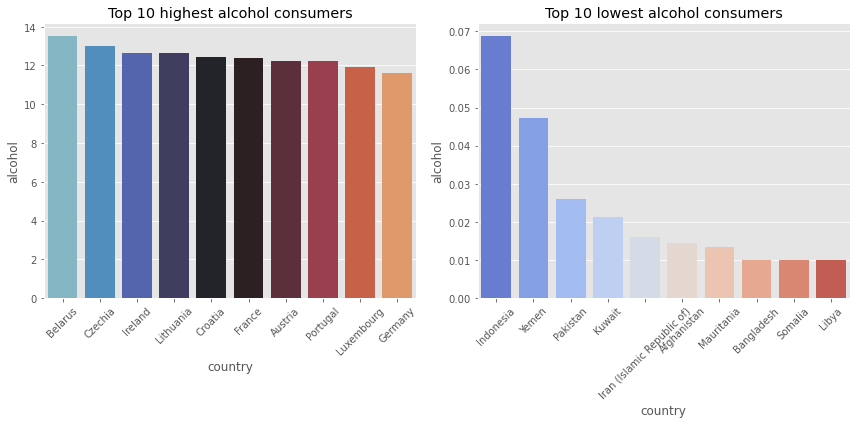

In [65]:
#data
df1 = countrywise_mean[['alcohol']].sort_values('alcohol', ascending=False).head(10)
df2 = countrywise_mean[['alcohol']].sort_values('alcohol', ascending=False).tail(10)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Top 10 highest alcohol consumers")
ax2 = fig.add_subplot(1, 2, 2, title="Top 10 lowest alcohol consumers")
sns.barplot(data=df1, x=df1.index, y= df1['alcohol'], ax=ax1, palette='icefire')
sns.barplot(data=df2, x=df2.index, y= df2['alcohol'], ax=ax2, palette='coolwarm')

ax1.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='x', labelrotation=45)
plt.tight_layout()

plt.show()

### Year wise analysis

In [66]:
yearwise_mean = who_df.groupby("year").mean()
yearwise_mean

,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,thinness 1-19 years,thinness 5-9 years,income composition of resources
year,,,,,,,,,,,,,,
2000,66.905587,181.385475,37.793296,4.634637,482.459307,4751.949721,34.453073,76.357542,5.595626,73.692737,2.569832,5.122346,5.220112,0.522006
2001,67.281564,173.111732,37.067039,4.619050,527.784550,4719.586592,36.176536,78.016760,5.603536,76.720670,2.612291,4.931285,5.029050,0.571195
2002,67.447222,169.877778,35.622222,4.703833,484.368267,3233.005556,37.019444,80.088889,5.681493,79.288889,2.596667,5.181111,5.132778,0.575659
2003,67.495556,167.533333,34.911111,4.732889,500.004817,3746.266667,36.341667,80.416667,5.825000,78.922222,2.568333,4.938333,5.038333,0.580094
2004,67.748333,184.950000,33.666667,4.797611,784.685277,2799.133333,36.470000,80.200000,5.858427,79.855556,2.497222,4.951111,5.043889,0.587682
2005,68.276667,166.111111,32.383333,4.864722,833.901756,3246.261111,35.496111,80.988889,5.921854,81.694444,2.361667,5.115000,5.211667,0.600094
2006,68.799448,170.027624,31.640884,4.934365,837.600716,2084.762431,37.534254,84.569061,5.708883,82.259669,2.169613,5.115470,5.157459,0.637193
2007,69.166298,158.066298,30.441989,5.030663,964.529105,1572.944751,36.977901,84.806630,5.636145,84.320442,1.990055,5.034807,4.976243,0.643901
2008,69.557459,172.977901,29.392265,5.023646,1107.200288,1539.348066,38.225414,85.569061,5.709385,84.850829,1.792265,4.907182,4.941436,0.650673


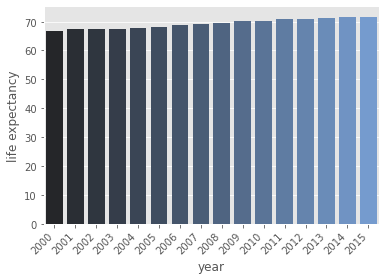

In [79]:
df = yearwise_mean.sort_values('life expectancy')[['life expectancy']]
sns.barplot(data=df, x=df.index, y=df['life expectancy'], palette='dark:#69d')

plt.xticks(rotation=45, ha='right')
plt.show()

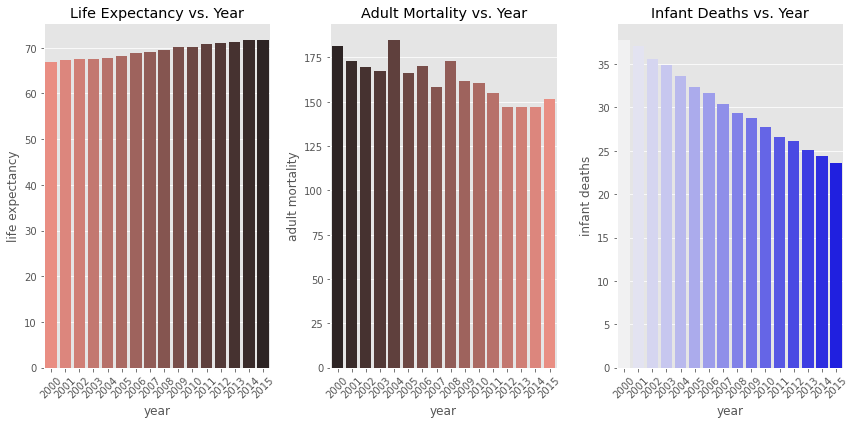

In [83]:
df1 = yearwise_mean[['life expectancy']].sort_values('life expectancy', ascending=False)
df2 = yearwise_mean[['adult mortality']].sort_values('adult mortality', ascending=False)
df3 = yearwise_mean[['infant deaths']].sort_values('infant deaths', ascending=False)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 3, 1, title="Life Expectancy vs. Year")
ax2 = fig.add_subplot(1, 3, 2, title="Adult Mortality vs. Year")
ax3 = fig.add_subplot(1, 3, 3, title="Infant Deaths vs. Year")

sns.barplot(data=df1, x=df1.index, y=df1['life expectancy'], ax=ax1, palette='dark:salmon_r')
sns.barplot(data=df2, x=df2.index, y=df2['adult mortality'], ax=ax2, palette='dark:salmon')
sns.barplot(data=df3, x=df3.index, y=df3['infant deaths'], ax=ax3, palette='light:b')

ax1.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='x', labelrotation=45)
ax3.tick_params(axis='x', labelrotation=45)
plt.tight_layout()

plt.show()

In [84]:
yearwise_mean.columns

Index(['life expectancy', 'adult mortality', 'infant deaths', 'alcohol',
       'percentage expenditure', 'measles', 'bmi', 'polio',
       'total expenditure', 'diphtheria', 'hiv/aids', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources'],
      dtype='object')

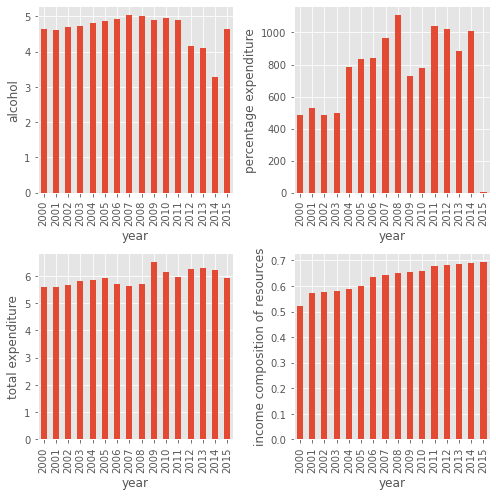

In [85]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['alcohol','percentage expenditure', 'total expenditure', 'income composition of resources']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    #sns.barplot(yearwise_mean[j], data=yearwise_mean)
    yearwise_mean[j].plot.bar()
    plt.xticks(rotation=90)
    plt.ylabel(j)
    plt.tight_layout()


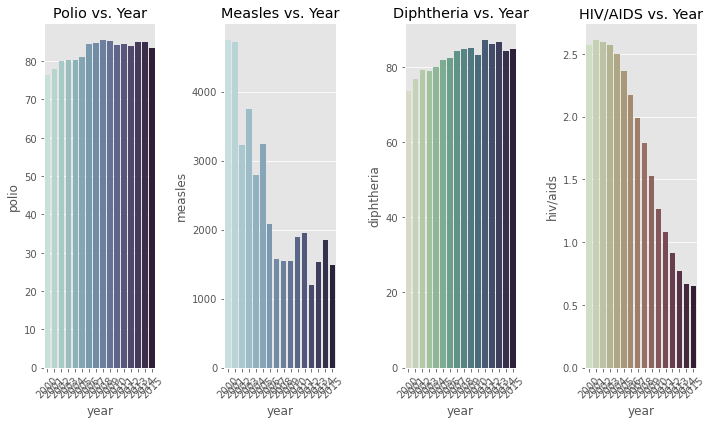

In [92]:
df1 = yearwise_mean[['polio']]
df2 = yearwise_mean[['measles']]
df3 = yearwise_mean[['diphtheria']]
df4 = yearwise_mean[['hiv/aids']]

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(1, 4, 1, title="Polio vs. Year")
ax2 = fig.add_subplot(1, 4, 2, title="Measles vs. Year")
ax3 = fig.add_subplot(1, 4, 3, title="Diphtheria vs. Year")
ax4 = fig.add_subplot(1, 4, 4, title="HIV/AIDS vs. Year")

sns.barplot(data=df1, x=df1.index, y='polio', ax=ax1, palette="ch:start=.5,rot=-.5")
sns.barplot(data=df2, x=df2.index, y='measles', ax=ax2, palette="ch:start=.2,rot=-.3")
sns.barplot(data=df3, x=df3.index, y='diphtheria', ax=ax3, palette="ch:start=.5,rot=-.75")
sns.barplot(data=df4, x=df4.index, y='hiv/aids', ax=ax4, palette="ch:start=.2,rot=.6")


ax1.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='x', labelrotation=45)
ax3.tick_params(axis='x', labelrotation=45)
ax4.tick_params(axis='x', labelrotation=45)
plt.tight_layout()

plt.show()

In [93]:
India_df = who_df[who_df["country"] == 'India'].drop(['country', 'status'], axis=1)
India_df.columns

Index(['year', 'life expectancy', 'adult mortality', 'infant deaths',
       'alcohol', 'percentage expenditure', 'measles', 'bmi', 'polio',
       'total expenditure', 'diphtheria', 'hiv/aids', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources'],
      dtype='object')

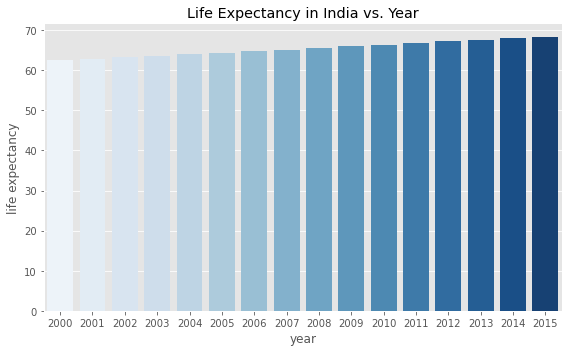

In [94]:
plt.figure(figsize=(8,5))
sns.barplot(India_df['year'], India_df['life expectancy'], palette='Blues')
plt.title("Life Expectancy in India vs. Year")
plt.tight_layout()
plt.show()

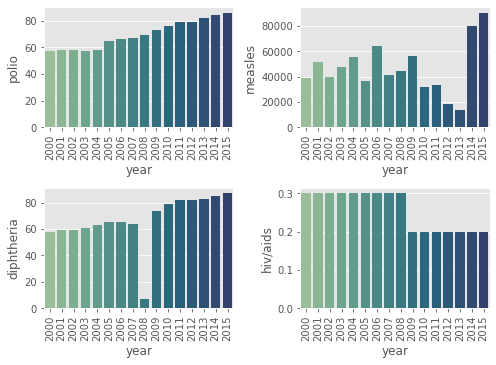

In [95]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['polio','measles', 'diphtheria', 'hiv/aids']):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.barplot(India_df['year'], j, data=India_df, palette='crest')
    plt.xticks(rotation=90)
    plt.tight_layout()


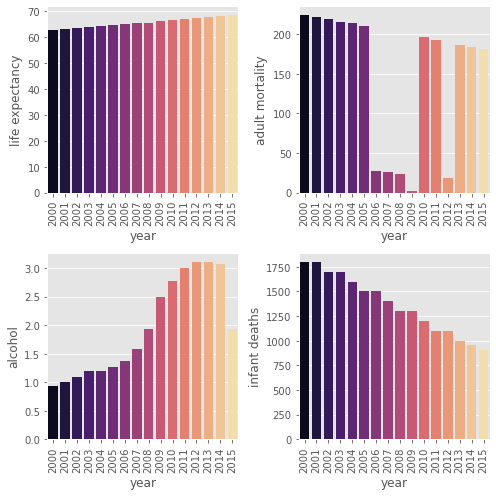

In [96]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['life expectancy','adult mortality', 'alcohol', 'infant deaths']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.barplot(India_df['year'], j, data=India_df, palette='magma')
    plt.xticks(rotation=90)
    plt.tight_layout()


In [97]:
### Status wise Analysis

In [98]:
who_df.status.unique()

array(['Developing', 'Developed'], dtype=object)

In [100]:

# plt.title("Life Expectancy vs. Year")
# plt.show()

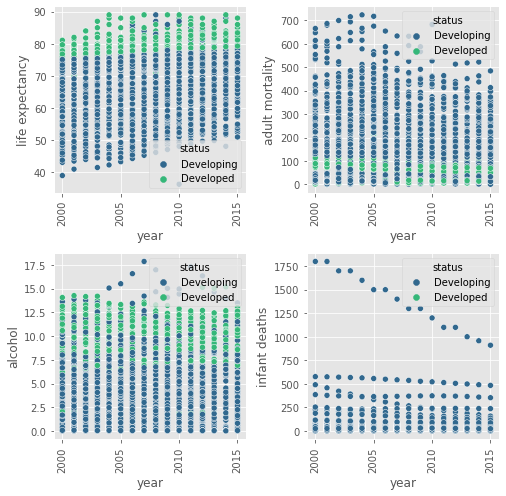

In [101]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['life expectancy','adult mortality', 'alcohol', 'infant deaths']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.scatterplot(x='year',y=j,data=who_df, hue='status', palette='viridis')
    plt.xticks(rotation=90)
    plt.tight_layout()


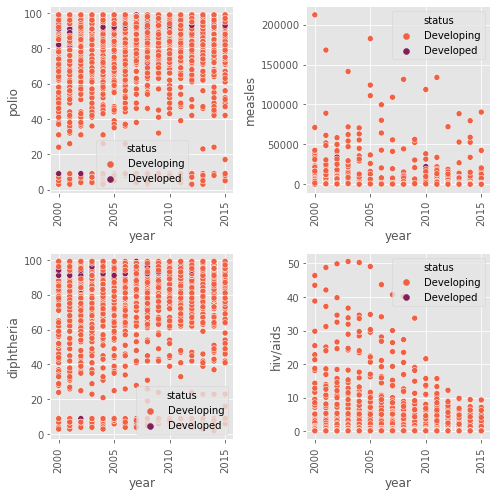

In [102]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['polio','measles', 'diphtheria', 'hiv/aids']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.scatterplot(x='year',y=j,data=who_df, hue='status', palette='rocket_r')
    plt.xticks(rotation=90)
    plt.tight_layout()


In [103]:
who_df.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'measles', 'bmi',
       'polio', 'total expenditure', 'diphtheria', 'hiv/aids',
       'thinness  1-19 years', 'thinness 5-9 years',
       'income composition of resources'],
      dtype='object')

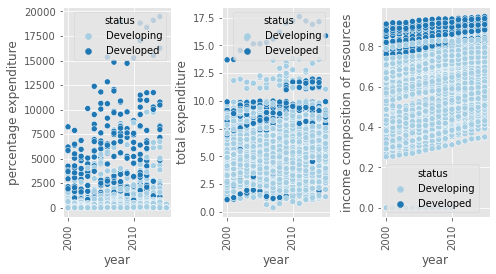

In [104]:
fig=plt.subplots(figsize=(7,7))

for i, j in enumerate(['percentage expenditure','total expenditure', 'income composition of resources']):
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x='year',y=j,data=who_df, hue='status', palette='Paired')
    plt.xticks(rotation=90)
    plt.tight_layout()


**Observation:**

Developed countries have lower adult mortality than developing countries
- which supports the higher life expectancy count in the former.

Developed countries have higher life expectancy than developing countries- which totally makes sense!

In [105]:
### Numeric Data Analysis

In [106]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2888 entries, 0 to 2937
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2888 non-null   object 
 1   year                             2888 non-null   int64  
 2   status                           2888 non-null   object 
 3   life expectancy                  2888 non-null   float64
 4   adult mortality                  2888 non-null   float64
 5   infant deaths                    2888 non-null   int64  
 6   alcohol                          2888 non-null   float64
 7   percentage expenditure           2888 non-null   float64
 8   measles                          2888 non-null   int64  
 9   bmi                              2888 non-null   float64
 10  polio                            2888 non-null   float64
 11  total expenditure                2856 non-null   float64
 12  diphtheria          

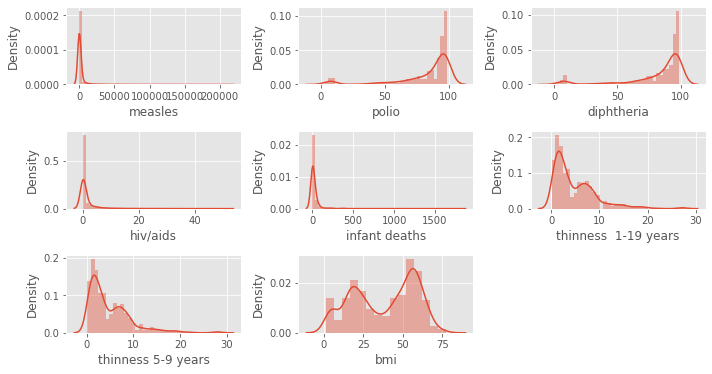

In [109]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(["measles", "polio", "diphtheria", "hiv/aids", "infant deaths", "thinness  1-19 years", "thinness 5-9 years", "bmi"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(who_df[j])
    plt.tight_layout()

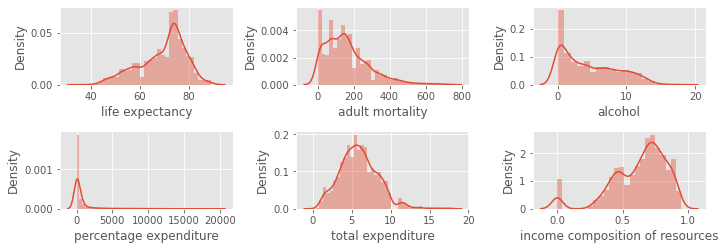

In [110]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(["life expectancy", "adult mortality", "alcohol", "percentage expenditure", "total expenditure", "income composition of resources"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(who_df[j])
    plt.tight_layout()

### Outlier Detection

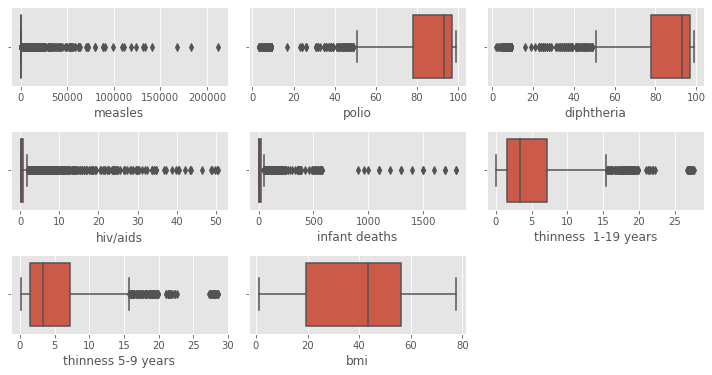

In [112]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(["measles", "polio", "diphtheria", "hiv/aids", "infant deaths", "thinness  1-19 years", "thinness 5-9 years", "bmi"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(who_df[j])
    plt.tight_layout()

In [113]:
X = who_df.drop(['life expectancy'], axis=1) 
y = who_df[['life expectancy']]

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [115]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[['total expenditure', 'income composition of resources']] = SI.fit_transform(X_train[['total expenditure', 'income composition of resources']])
X_test[['total expenditure', 'income composition of resources']] = SI.transform(X_test[['total expenditure', 'income composition of resources']])

In [116]:
X_train.isnull().sum()

country                            0
year                               0
status                             0
adult mortality                    0
infant deaths                      0
alcohol                            0
percentage expenditure             0
measles                            0
bmi                                0
polio                              0
total expenditure                  0
diphtheria                         0
hiv/aids                           0
thinness  1-19 years               0
thinness 5-9 years                 0
income composition of resources    0
dtype: int64

# Data Visualization 

In [118]:
who_df_copy = who_df.copy()

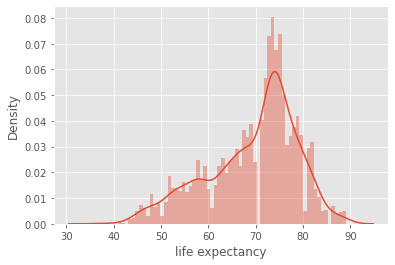

In [119]:
"""
Observation
===========
Peak value of life expectancy is arounf 72 years.

"""
sns.distplot(who_df_copy['life expectancy'], bins=70)
plt.show()

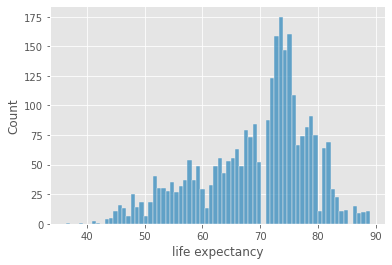

In [139]:
sns.histplot(who_df_copy['life expectancy'], bins=70)
plt.show()

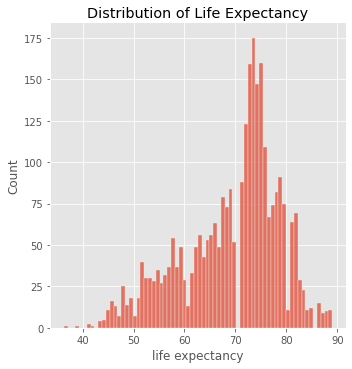

In [135]:
sns.displot(who_df_copy['life expectancy'], kind='hist',bins=70)
plt.title("Distribution of Life Expectancy")
plt.show()

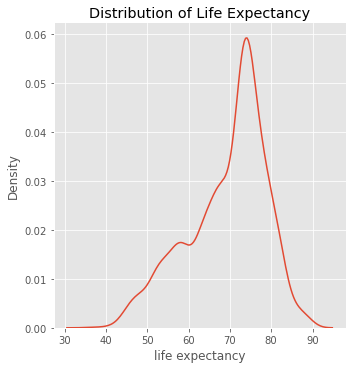

In [137]:
sns.displot(who_df_copy['life expectancy'], kind='kde')
plt.title("Distribution of Life Expectancy")
plt.show()

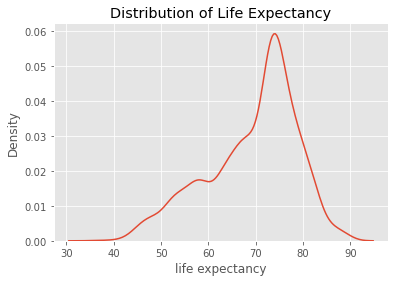

In [140]:
sns.kdeplot(who_df_copy['life expectancy'])
plt.title("Distribution of Life Expectancy")
plt.show()

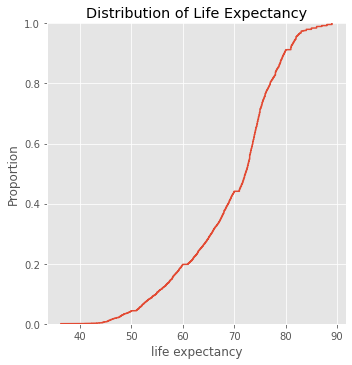

In [138]:
sns.displot(who_df_copy['life expectancy'], kind='ecdf')
plt.title("Distribution of Life Expectancy")
plt.show()

<AxesSubplot:xlabel='adult mortality', ylabel='Density'>

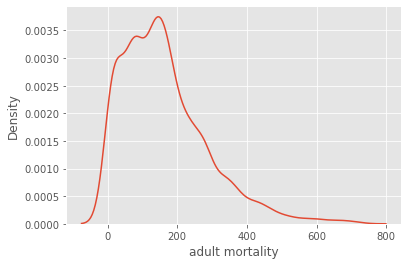

In [120]:
"""
Observation
===========
Adult mortality has most frequent value of 200

"""
sns.kdeplot(who_df_copy['adult mortality'])


In [121]:
Italy_df = who_df_copy.iloc[1280:1296,:]
Italy_df

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,thinness 1-19 years,thinness 5-9 years,income composition of resources
1282,Italy,2015,Developed,82.7,56.0,1,8.266667,0.000000,159,63.6,93.0,8.777333,93.0,0.1,0.6,0.6,0.881
1283,Italy,2014,Developed,82.5,57.0,2,7.560000,4831.644796,0,63.1,95.0,9.250000,95.0,0.1,0.6,0.6,0.877
1284,Italy,2013,Developed,82.3,58.0,2,7.350000,483.191684,0,62.6,96.0,9.220000,96.0,0.1,0.5,0.6,0.876
1285,Italy,2012,Developed,82.0,6.0,2,7.490000,4793.904924,376,62.1,96.0,9.280000,97.0,0.1,0.5,0.6,0.877
1286,Italy,2011,Developed,82.0,6.0,2,6.980000,5439.691769,5189,61.5,96.0,9.270000,96.0,0.1,0.5,0.5,0.872
1287,Italy,2010,Developed,81.8,6.0,2,6.950000,5219.668802,372,61.0,96.0,9.420000,96.0,0.1,0.5,0.5,0.869
1288,Italy,2009,Developed,81.6,61.0,2,7.250000,5243.316638,351,6.5,96.0,9.410000,96.0,0.1,0.5,0.5,0.868
1289,Italy,2008,Developed,81.5,61.0,2,7.960000,66.378405,1617,59.9,96.0,8.890000,96.0,0.1,0.5,0.5,0.866
1290,Italy,2007,Developed,81.3,63.0,2,8.370000,5228.821581,321,59.4,97.0,8.480000,97.0,0.1,0.5,0.5,0.862
1291,Italy,2006,Developed,81.2,65.0,2,8.440000,473.191545,439,58.8,97.0,8.820000,96.0,0.1,0.5,0.5,0.856


<AxesSubplot:xlabel='year'>

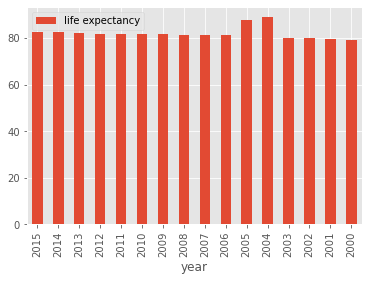

In [122]:
"""
Observation
===========
There is very slow upwards rise in life expectancy of Italy over the years.
2004 and 2005 are the best years.

"""

Italy_df.plot(kind='bar',y='life expectancy',x='year')

<AxesSubplot:xlabel='life expectancy', ylabel='Density'>

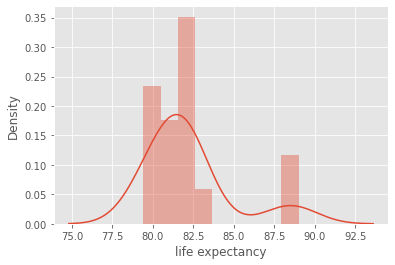

In [123]:
"""
Observation
===========
Life expectancy of Italy has it's peak at 82 years!

"""

sns.distplot(Italy_df['life expectancy'])

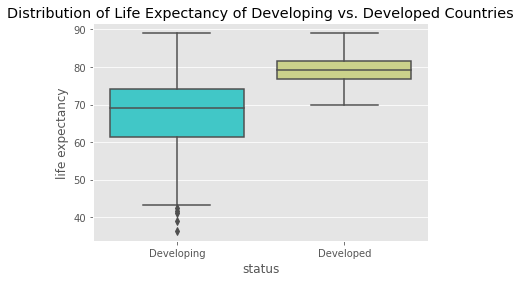

In [131]:
sns.boxplot(x="status", y="life expectancy", data=who_df_copy,palette='rainbow')
plt.title("Distribution of Life Expectancy of Developing vs. Developed Countries")
plt.show()

## Violine Plot

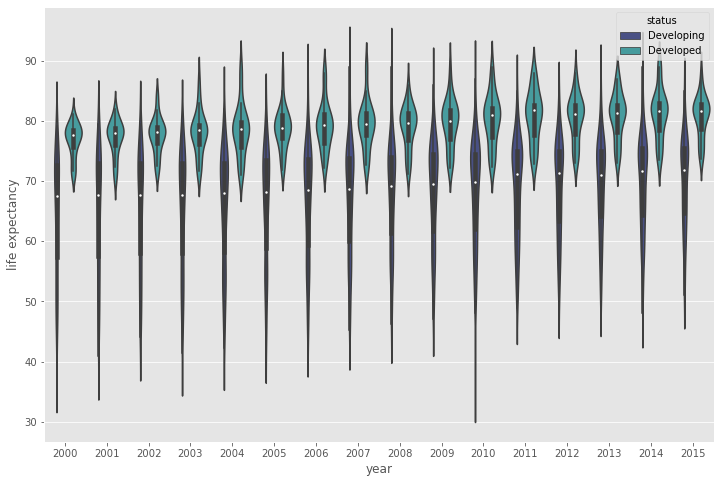

In [191]:

plt.figure(figsize=[12,8])
sns.violinplot(data=who_df_copy[['life expectancy', 'adult mortality', 'status', 'year']], 
               x=who_df_copy['year'],
               y = who_df_copy['life expectancy'],
               hue=who_df_copy['status'],
              palette='mako')
plt.show()

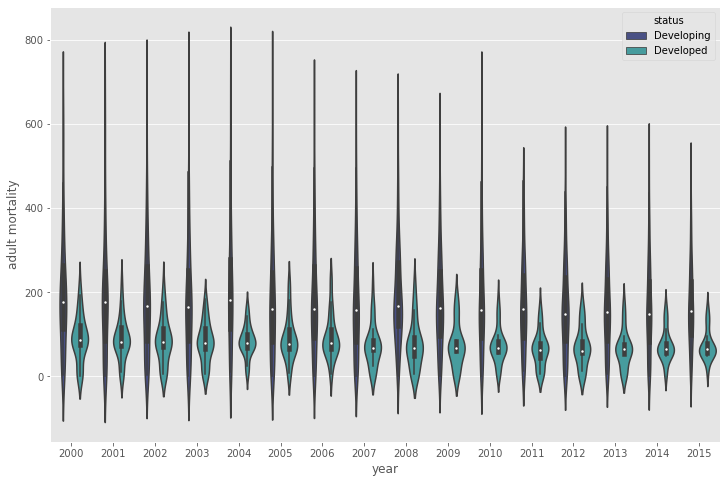

In [192]:
plt.figure(figsize=[12,8])
sns.violinplot(data=who_df_copy[['adult mortality', 'adult mortality', 'status', 'year']], 
               x=who_df_copy['year'],
               y = who_df_copy['adult mortality'],
               hue=who_df_copy['status'],
              palette='mako')
plt.show()

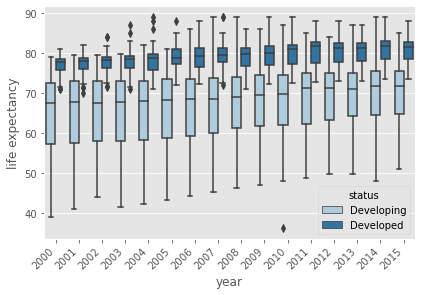

In [132]:
sns.boxplot(x="year", y="life expectancy", data=who_df_copy,palette='Paired', hue='status')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [141]:
who_df_copy

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,thinness 1-19 years,thinness 5-9 years,income composition of resources
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,6.0,8.16,65.0,0.1,17.2,17.3,0.479
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,58.0,8.18,62.0,0.1,17.5,17.5,0.476
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,62.0,8.13,64.0,0.1,17.7,17.7,0.470
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,67.0,8.52,67.0,0.1,17.9,18.0,0.463
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,68.0,7.87,68.0,0.1,18.2,18.2,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,67.0,7.13,65.0,33.6,9.4,9.4,0.407
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,7.0,6.52,68.0,36.7,9.8,9.9,0.418
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,73.0,6.53,71.0,39.8,1.2,1.3,0.427
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,76.0,6.16,75.0,42.1,1.6,1.7,0.427


## Pie Chart

,Status,Countries
0,Developing,149
1,Developed,32


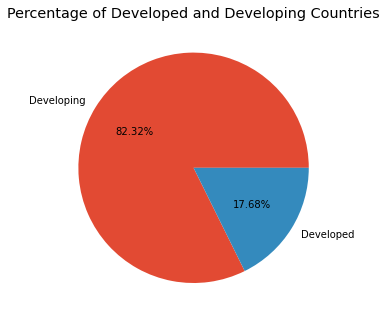

In [146]:
# Checking percentage of developing vs developed countries in a given year

data = pd.DataFrame()
data['Status'] = ['Developing', 'Developed']
data['Countries'] = [who_df_copy[(who_df_copy['year'] == 2015) & (who_df_copy['status'] == 'Developing')]['country'].nunique(),
                     who_df_copy[(who_df_copy['year'] == 2015) & (who_df_copy['status'] == 'Developed')]['country'].nunique()]

display(data)

fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(data['Countries'], labels=data['Status'], autopct='%1.2f%%')
plt.title('Percentage of Developed and Developing Countries')
plt.show()

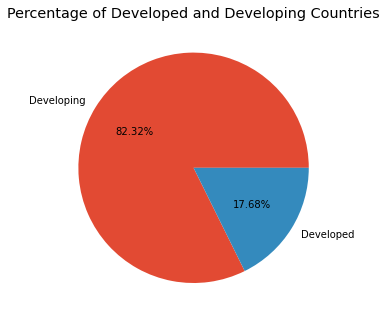

In [149]:
fig=plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.pie(data['Countries'], labels=data['Status'], autopct='%1.2f%%')
plt.title('Percentage of Developed and Developing Countries')
plt.show()

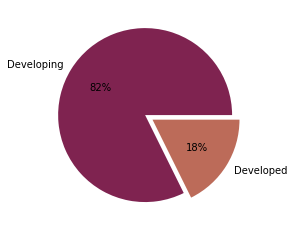

In [157]:
palette_color = sns.color_palette('twilight_shifted_r')
explode = [0, 0.1]
plt.pie(data['Countries'], labels=data['Status'], colors=palette_color, explode=explode, autopct='%.0f%%')
plt.show()

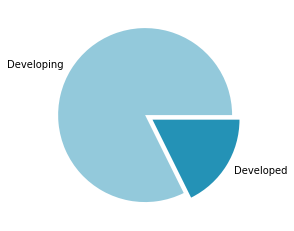

In [165]:
palette_color = sns.color_palette('ocean_r')
explode = [0, 0.1]
plt.pie(data['Countries'], labels=data['Status'], colors=palette_color, explode=explode)
plt.show()

## Count Plot

<AxesSubplot:xlabel='status', ylabel='count'>

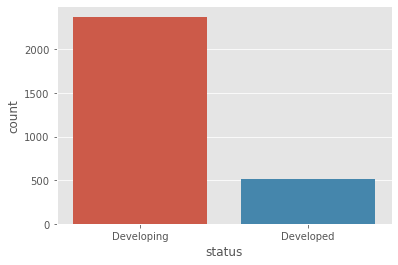

In [168]:
sns.countplot(data=who_df_copy, x=who_df_copy['status']) #, y=who_df_copy['year'])

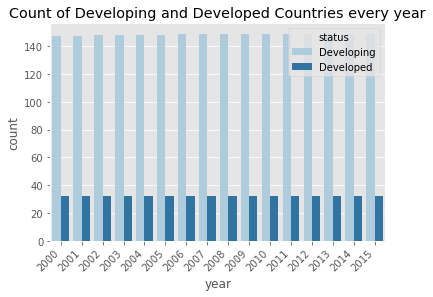

In [176]:
sns.countplot(data=who_df_copy, x=who_df_copy['year'], hue=who_df_copy['status'], palette='Paired')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Developing and Developed Countries every year')
plt.show()

In [166]:
who_df_copy

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,thinness 1-19 years,thinness 5-9 years,income composition of resources
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,6.0,8.16,65.0,0.1,17.2,17.3,0.479
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,58.0,8.18,62.0,0.1,17.5,17.5,0.476
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,62.0,8.13,64.0,0.1,17.7,17.7,0.470
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,67.0,8.52,67.0,0.1,17.9,18.0,0.463
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,68.0,7.87,68.0,0.1,18.2,18.2,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,67.0,7.13,65.0,33.6,9.4,9.4,0.407
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,7.0,6.52,68.0,36.7,9.8,9.9,0.418
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,73.0,6.53,71.0,39.8,1.2,1.3,0.427
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,76.0,6.16,75.0,42.1,1.6,1.7,0.427


## Stacked Bar plot

Text(0.5, 1.0, 'Monthly Temperatures in a year')

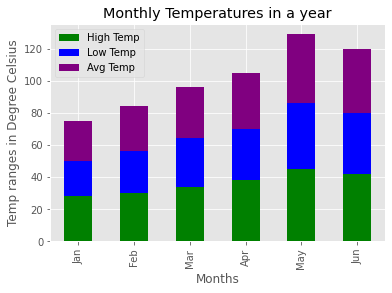

In [180]:
df = pd.DataFrame({'High Temp': [28, 30, 34, 38, 45, 42],
                   'Low Temp': [22, 26, 30, 32, 41, 38],
                   'Avg Temp': [25, 28, 32, 35, 43, 40]},
                  index=['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun'])

df.plot(kind='bar', stacked=True, color=['green', 'blue', 'purple'])
sns.barplot()
plt.xlabel('Months')
plt.ylabel('Temp ranges in Degree Celsius')
plt.title('Monthly Temperatures in a year')

## Line Plot

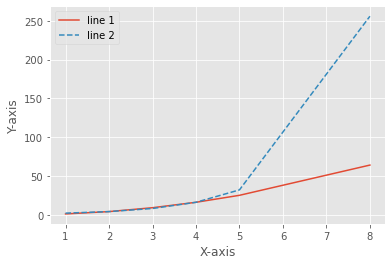

In [203]:
#data
x = np.array([1, 2, 3, 4, 5, 8])
y1 = x**2
y2 = 2**x
  
plt.plot(x, y1, label = "line 1", linestyle="-")
plt.plot(x, y2, label = "line 2", linestyle="--")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
  

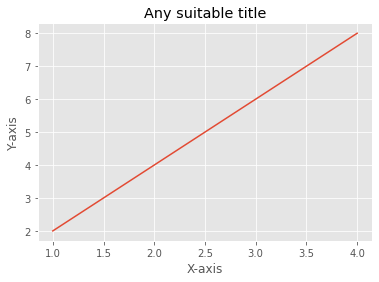

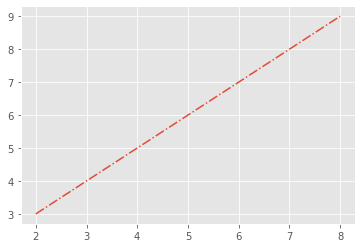

In [193]:
# The figure() function helps in creating a
# new figure that can hold a new chart in it.
plt.figure()
x1 = [2, 4, 6, 8]
y1 = [3, 5, 7, 9]
plt.plot(x1, y1, '-.')
  
# Show another chart with '-' dotted line
plt.show()

## Pair Plot

In [206]:
penguins = sns.load_dataset("penguins")
penguins

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>